In [1]:
import pandas as pd # Loadind Data
import matplotlib.pyplot as plt  # To visualize
df = pd.read_csv("CleanDataBase.csv")
df.shape
df.head()

,ID,GroupNum,Height,Weight,Age,Male,RightLeg,AdaptationDuration,Abrupt,MidSpeed,...,TMAfter,OGBase,OGAfter,IsCatch,Stroke,TextSpeedRatio,BMI,Young,TMSteadyGood,TMAfterGood
0,B001,1,160.0,60.9,20.0,0,1,604,1,1100,...,0.34534,-0.159450,-0.159450,1,0,2.0,23.789062,1,1,1
1,B002,1,183.5,70.5,-1.0,1,1,602,1,1000,...,NaN,-0.042375,-0.042375,1,0,2.0,20.937122,1,1,0
2,B003,1,174.0,68.0,20.0,0,1,602,1,1100,...,0.13394,0.005824,0.005824,1,0,2.0,22.460034,1,1,1
3,B004,1,159.0,59.2,20.0,1,1,603,1,1000,...,0.15988,0.057757,0.057757,1,0,2.0,23.416795,1,0,1
4,BC001,1,160.0,60.9,20.0,0,1,601,1,1100,...,0.12224,-0.029394,-0.029394,1,0,2.0,23.789062,1,1,1


# Feature Selection

Feature Selection: Random Forrest Indicated the following terms could be important
---
https://chrisalbon.com/machine_learning/linear_regression/adding_interaction_terms/

Single Features:
- Early A
- MidBase
- AdaptationDuration
- Height
- SpeedDifference
- Age

Two-Way Feature Interactions:
- ('AdaptationDuration', 'Age')
- ('Age', 'Height')
- ('EarlyA', 'AdaptationDuration')
- ('EarlyA', 'Height')
- ('EarlyA', 'MidBase')
- ('EarlyA', 'Weight')
- ('Height', 'Weight')
- ('MidBase', 'AdaptationDuration')
- ('MidBase', 'Age')
- ('MidSpeed', 'AdaptationDuration')
- ('MidSpeed', 'Height')
- ('Weight', 'BMI')

Three-Way Feature Interactions:
- 'SpeedDifference', 'EarlyA', 'AdaptationDuration'
- 'MidSpeed', 'Abrupt', 'Young'
- 'Abrupt', 'Young', 'IsCatch'
- 'Young', 'IsCatch', 'Stroke'


How to code it:
Target, Features = dmatrices('TMSteadyGood ~ EarlyA + MidBase + AdaptationDuration + Height + SpeedDifference + Age + \
                 AdaptationDuration*Age + Age*Height + EarlyA*AdaptationDuration + EarlyA*Height + EarlyA*MidBase + \
                 EarlyA*Weight + Height*Weight + MidBase*AdaptationDuration + \
                 MidBase*Age + MidSpeed*AdaptationDuration + MidSpeed*Height + Weight*BMI + \
                 SpeedDifference*EarlyA*AdaptationDuration + MidSpeed*C(Abrupt)*C(Young) + C(Abrupt)*C(Young)*C(IsCatch) + \
                 C(Young)*C(IsCatch)*C(Stroke)', df, return_type="dataframe")

In [2]:
from patsy import dmatrices

Y, X = dmatrices('TMSteadyGood ~ EarlyA + MidBase + AdaptationDuration + Height + SpeedDifference + Age + \
    AdaptationDuration*Age + Age*Height + EarlyA*AdaptationDuration + EarlyA*Height + EarlyA*MidBase + \
    EarlyA*Weight + Height*Weight + MidBase*AdaptationDuration + \
    MidBase*Age + MidSpeed*AdaptationDuration + MidSpeed*Height + Weight*BMI + \
    SpeedDifference*EarlyA*AdaptationDuration + MidSpeed*C(Abrupt)*C(Young) + C(Abrupt)*C(Young)*C(IsCatch) + \
    C(Young)*C(IsCatch)*C(Stroke)', df, return_type="dataframe")
list(X)

['Intercept',
 'C(Abrupt)[T.1]',
 'C(Young)[T.1]',
 'C(IsCatch)[T.1]',
 'C(Stroke)[T.1]',
 'C(Abrupt)[T.1]:C(Young)[T.1]',
 'C(Abrupt)[T.1]:C(IsCatch)[T.1]',
 'C(Young)[T.1]:C(IsCatch)[T.1]',
 'C(Young)[T.1]:C(Stroke)[T.1]',
 'C(IsCatch)[T.1]:C(Stroke)[T.1]',
 'C(Abrupt)[T.1]:C(Young)[T.1]:C(IsCatch)[T.1]',
 'C(Young)[T.1]:C(IsCatch)[T.1]:C(Stroke)[T.1]',
 'EarlyA',
 'MidBase',
 'AdaptationDuration',
 'Height',
 'SpeedDifference',
 'Age',
 'AdaptationDuration:Age',
 'Age:Height',
 'EarlyA:AdaptationDuration',
 'EarlyA:Height',
 'EarlyA:MidBase',
 'Weight',
 'EarlyA:Weight',
 'Height:Weight',
 'MidBase:AdaptationDuration',
 'MidBase:Age',
 'MidSpeed',
 'MidSpeed:C(Abrupt)[T.1]',
 'MidSpeed:C(Young)[T.1]',
 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]',
 'MidSpeed:AdaptationDuration',
 'MidSpeed:Height',
 'BMI',
 'Weight:BMI',
 'SpeedDifference:EarlyA',
 'SpeedDifference:AdaptationDuration',
 'SpeedDifference:EarlyA:AdaptationDuration']

Feature Selection: Collinearity 
---

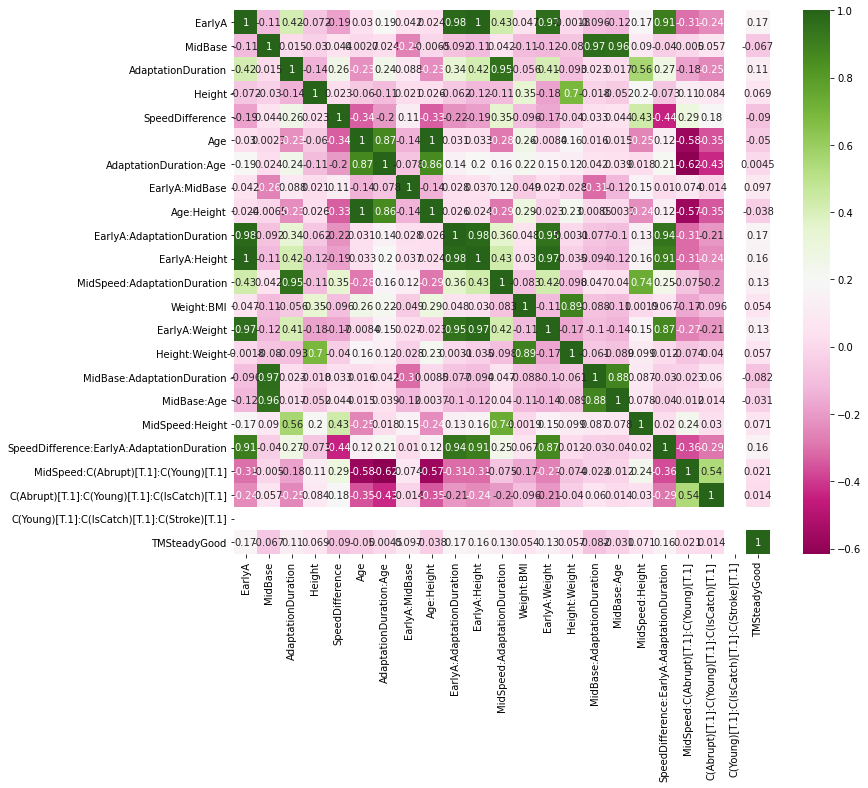

In [3]:
import seaborn as sns # Also to visualize

df_Interactions = pd.concat([X,Y], axis=1)

feature_cols = ['EarlyA', 'MidBase', 'AdaptationDuration', 'Height', 'SpeedDifference', 'Age', \
               'AdaptationDuration:Age', 'EarlyA:MidBase', 'Age:Height', 'EarlyA:AdaptationDuration', \
               'EarlyA:Height','MidSpeed:AdaptationDuration', 'Weight:BMI', 'EarlyA:Weight', \
                'Height:Weight', 'MidBase:AdaptationDuration', 'MidBase:Age', 'MidSpeed:Height', \
               'SpeedDifference:EarlyA:AdaptationDuration', 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]', \
               'C(Abrupt)[T.1]:C(Young)[T.1]:C(IsCatch)[T.1]', 'C(Young)[T.1]:C(IsCatch)[T.1]:C(Stroke)[T.1]']


target_cols = ["TMSteadyGood"]


#Using Pearson Correlation
plt.figure(figsize = (12,10))
cor = df_Interactions[feature_cols + target_cols].corr()
sns.heatmap(cor, annot = True, cmap = "PiYG")
plt.show()

A few of the measures are very coorelated with each other so I have removed a few features:

In [4]:
feature_cols = ['SpeedDifference', \
               'AdaptationDuration:Age', 'EarlyA:MidBase', 'EarlyA:AdaptationDuration', \
               'MidSpeed:AdaptationDuration',  \
                'Height:Weight', 'MidBase:AdaptationDuration', 'MidBase:Age', \
               'SpeedDifference:EarlyA:AdaptationDuration', 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]', \
               'C(Abrupt)[T.1]:C(Young)[T.1]:C(IsCatch)[T.1]', 'C(Young)[T.1]:C(IsCatch)[T.1]:C(Stroke)[T.1]']

Feature Selection: Recursive Feature Estimation 
---
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

numFeatures = len(df_Interactions[feature_cols])

logreg = LogisticRegression(max_iter=1000)

rfe = RFE(logreg, numFeatures)
rfe = rfe.fit(df_Interactions[feature_cols], df_Interactions[target_cols].values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


Feature Selection: Train the Model for Statistical Purposes and Feature Selection
---

In [6]:
# Can't use the categorical measures for this:
feature_cols = ['EarlyA', 'MidBase', 'AdaptationDuration', 'Height', 'SpeedDifference', 'Age', \
               'AdaptationDuration:Age', 'EarlyA:MidBase', 'Age:Height', 'EarlyA:AdaptationDuration', \
               'EarlyA:Height','MidSpeed:AdaptationDuration', 'Weight:BMI', 'EarlyA:Weight', \
                'Height:Weight', 'MidBase:AdaptationDuration', 'MidBase:Age', 'MidSpeed:Height', \
               'SpeedDifference:EarlyA:AdaptationDuration']

In [7]:
import statsmodels.api as sm

logit_model = sm.Logit(df_Interactions[target_cols],df_Interactions[feature_cols])
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625157
         Iterations 6
                                      Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.098     
Dependent Variable:           TMSteadyGood             AIC:                      646.9025  
Date:                         2020-04-13 09:45         BIC:                      726.4795  
No. Observations:             487                      Log-Likelihood:           -304.45   
Df Model:                     18                       LL-Null:                  -337.39   
Df Residuals:                 468                      LLR p-value:              2.2237e-07
Converged:                    1.0000                   Scale:                    1.0000    
No. Iterations:               6.0000                                                       
-------------------------------------------------------------------------------------------
                 

Feature Selection: Compiled Features
---

In [8]:
# "FULL" Model -- final accuracy is 0.69
feature_cols = ['EarlyA', 'MidBase', 'AdaptationDuration', 'Height', 'SpeedDifference', 'Age', \
               'AdaptationDuration:Age', 'EarlyA:MidBase', 'Age:Height', 'EarlyA:AdaptationDuration', \
               'EarlyA:Height','MidSpeed:AdaptationDuration', 'Weight:BMI', 'EarlyA:Weight', \
                'Height:Weight', 'MidBase:AdaptationDuration', 'MidBase:Age', 'MidSpeed:Height', \
               'SpeedDifference:EarlyA:AdaptationDuration', 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]', \
               'C(Abrupt)[T.1]:C(Young)[T.1]:C(IsCatch)[T.1]', 'C(Young)[T.1]:C(IsCatch)[T.1]:C(Stroke)[T.1]']

In [9]:
#Simpler model that does almost as well as the full model? -- final accuracy is 0.64
feature_cols = ['EarlyA:MidBase', 'Age:Height', 'MidSpeed:AdaptationDuration', 'Weight:BMI', \
             'SpeedDifference:EarlyA:AdaptationDuration', 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]'] 

In [10]:
# Hand Tuned Model  -- final accuracy is 0.71
feature_cols = ['MidBase', 'AdaptationDuration', 'SpeedDifference', 'Age', \
                'AdaptationDuration:Age', 'EarlyA:MidBase', 'Age:Height',  \
               'MidSpeed:AdaptationDuration', 'Weight:BMI',  'EarlyA:Weight',   \
                'Height:Weight', 'MidBase:AdaptationDuration', 'MidBase:Age', 'MidSpeed:Height', \
               'SpeedDifference:EarlyA:AdaptationDuration', 'MidSpeed:C(Abrupt)[T.1]:C(Young)[T.1]']    


In [11]:
Features = df_Interactions[feature_cols]
Target = df_Interactions[target_cols]

Up-Sampling
---
My TMSteadyGood target is reasonably well dispersed between 'good' and 'bad' adapters.

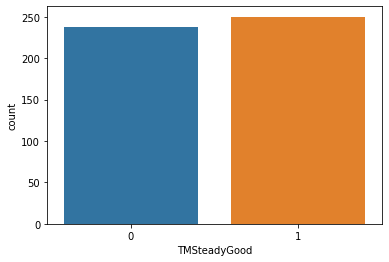

In [12]:
import seaborn as sns # Also to visualize
sns.countplot(x = "TMSteadyGood", data = df)
plt.show()

Split the Data into Training and Testing Sets
---

In [13]:
import numpy as np
np.random.seed(37)

# Split data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,Target,test_size = 0.2)


y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

Train the Model
---

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter=9000)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=9000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_predictions = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [16]:
# Actual class predictions
log_probs = logreg.predict_proba(X_test)[:, 1]

# Training predictions (to demonstrate overfitting)
train_log_predictions = logreg.predict(X_train)
train_log_probs = logreg.predict_proba(X_train)[:, 1]

Confusion Matrix
---

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt  # To visualize

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #print(cm)
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.show()

Confusion matrix, without normalization


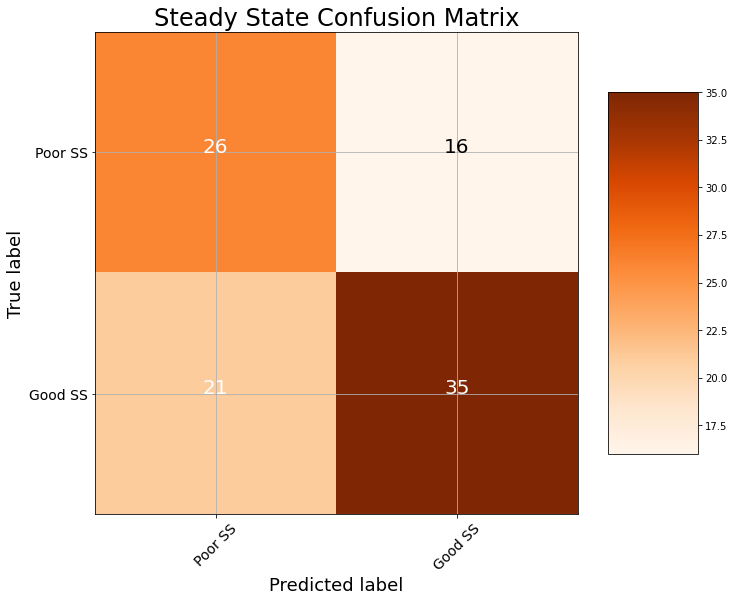

In [18]:
import numpy as np

cm = confusion_matrix(y_test, log_predictions)
plot_confusion_matrix(cm, classes = ['Poor SS', 'Good SS'],
                      title = 'Steady State Confusion Matrix')

ROC Curve
---

In [19]:
## Taken from: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs, train_labels, test_labels):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.62 Train: 0.55
Precision Baseline: 0.57 Test: 0.69 Train: 0.6
Roc Baseline: 0.5 Test: 0.63 Train: 0.65


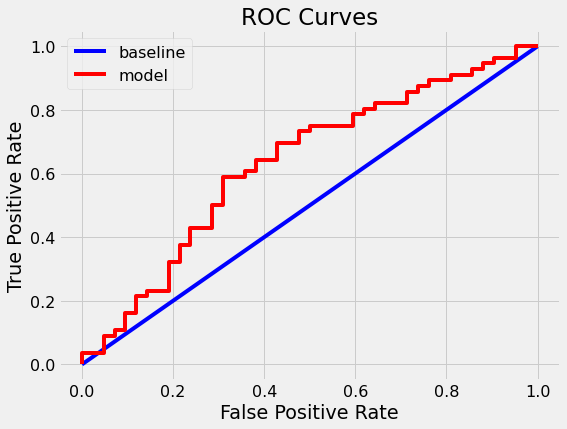

In [20]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, log_probs)

evaluate_model(log_predictions, log_probs, train_log_predictions, train_log_probs, y_train, y_test)

Precision Recall Curve
---


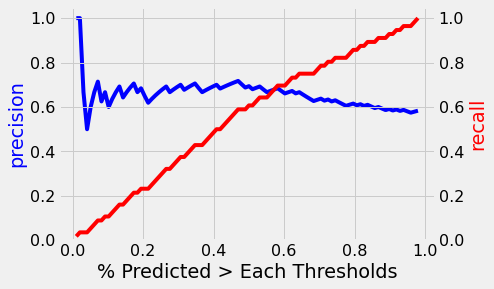

In [21]:
# Based on: https://github.com/dssg/hitchhikers-guide/blob/master/sources/curriculum/3_modeling_and_machine_learning/machine-learning/machine_learning_clean.ipynb
from sklearn.metrics import precision_recall_curve
import numpy as np # Data cleaning and manipulaitons
y_score = logreg.predict_proba(X_test)[:,1]
predicted_prob = np.array(y_score)
y_prob = np.array(y_test)

precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_prob, predicted_prob)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(y_score)
for value in pr_thresholds:
    num_above_thresh = len(y_score[y_score>=value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)

fig, ax1 = plt.subplots()
    
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('% Predicted > Each Thresholds')
ax1.set_ylabel('precision', color='b')
ax1.set_ylim(0,1.05)
ax2 = ax1.twinx()
ax2.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
ax2.set_ylim(0,1.05)
    
plt.show()
plt.clf()



Best Accuracy from the training data
---

In [22]:
# Taken from the hitchhikers guide page
calc_threshold = lambda x,y: 0 if x < y else 1 

In [23]:
# AN ORIGONAL FUNCTION BY CARLY -- WHAT THRESHOLD GIVES YOU THE PEAK ACCURACY?
from sklearn.metrics import accuracy_score


def CarlyPeakAccuacy(expected, predicted):
    accuracy = []
    Thresholds = np.arange(0, 1, .001)
    for i in Thresholds:
        accuracy.append(accuracy_score(expected, np.array([calc_threshold(score,i) for score in predicted])))
    
    MaxAccuracy = np.max(accuracy)
    IdealThreshold = Thresholds[accuracy.index(MaxAccuracy)]
    
    print('Training accuracy peaks at {:.2f} when the threshold is {:.3f}'.format(MaxAccuracy, IdealThreshold))
    return IdealThreshold


In [24]:
#Compute the Ideal threshold on the training set
y_score_train = logreg.predict_proba(X_train)[:,1]
predicted = np.array(y_score_train)
expected = np.array(y_train)
Threshold = CarlyPeakAccuacy(expected, predicted)

Training accuracy peaks at 0.62 when the threshold is 0.525


I will now use the ideal threshold from the training set, to determine the best accuracy from the test set.

In [25]:
# Compute the accuracy on the testing set with the ideal threshold for the training set.
from sklearn.metrics import precision_score

y_pred = logreg.predict_proba(X_test)[:,1]
y_pred2 = np.asarray([1 if i >= Threshold else 0 for i in y_pred ])

TestAcc=precision_score(y_test, y_pred2)
print('Testing set accuracy is {:.2f} with a threshold of {:.3f} (As was deemed optimal from the training set)'.format(TestAcc, Threshold))

Testing set accuracy is 0.71 with a threshold of 0.525 (As was deemed optimal from the training set)


Summary
---

In summary, I am able to use subject demographics, protocol details, and baseline gait features to predict with 71% accuracy if a subject will reach a "good" or a "poor" steady state.